
# Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.

2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

3. Extract the target variable.

4. Extract the independent variables and scale them.

5. Build the logistic regression model.

6. Evaluate the model.

7. Even a simple model will give us more than 70% accuracy. Why?

8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score

In [2]:
data = pd.read_csv('files_for_lab/customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
Y = data['Churn']
data.drop(['Churn'], axis = 1, inplace = True)

In [5]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
X.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


## Scaling the Data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
transformer =  StandardScaler().fit(X)

In [8]:
X_scaled = transformer.transform(X)

## Train-test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.4, random_state=100)

## Training the model

In [10]:
from sklearn.linear_model import LogisticRegression
classification1 = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class = 'ovr').fit(X_train, y_train)

## Validating the model

In [11]:
print("The accuracy of the model in the TEST set is: ", round(classification1.score(X_test, y_test),2))
print("The kappa of the model is: ",round(cohen_kappa_score(Y,classification1.predict(X_scaled)),2))

The accuracy of the model in the TEST set is:  0.78
The kappa of the model is:  0.41


In [12]:
predictions = classification1.predict(X_test)
classification1.score(X_test, y_test)

0.7821149751596878

In [13]:
y_test.value_counts()

No     2066
Yes     752
Name: Churn, dtype: int64

Imbalance!!

## Getting the confussion matrix

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, predictions)

array([[1867,  199],
       [ 415,  337]])

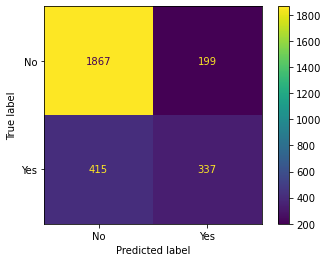

In [15]:
plot_confusion_matrix(classification1, X_test, y_test)

We can not rate our model properly, having a good accuracy if the kappa is low

## Upsampling and downsampling

### Downsampling

In [16]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler()

transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)

X_rus, y_rus = rus.fit_sample(X_scaled, Y)

In [17]:
pd.DataFrame(y_rus).value_counts()

Churn
Yes      1869
No       1869
dtype: int64

In [18]:
classification2 = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_rus, y_rus)

print("The accuracy of the model is: ",round(classification2.score(X_rus, y_rus),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_rus,classification2.predict(X_rus)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.46


In [19]:
predictions = classification2.predict(X_rus)
classification2.score(X_rus, y_rus)

0.7314071696094168

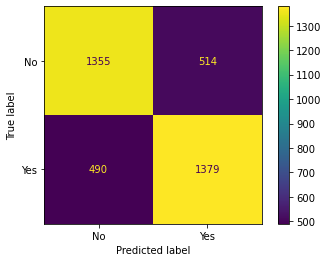

In [20]:
plot_confusion_matrix(classification2, X_rus, y_rus)

### Upsampling

In [21]:
ros = RandomOverSampler()

transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)

X_ros, y_ros = ros.fit_sample(X_scaled, Y)

In [22]:
pd.DataFrame(y_ros).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [23]:
classification3 = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_ros, y_ros)

print("The accuracy of the model is: ",round(classification3.score(X_ros, y_ros),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_ros,classification3.predict(X_ros)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.46


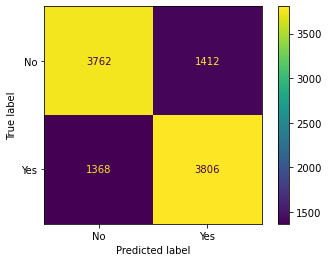

In [24]:
plot_confusion_matrix(classification3, X_ros, y_ros)

## SMOTE

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)

X_sm, y_sm = smote.fit_sample(X_scaled, Y)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [26]:
classification4 = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

print("The accuracy of the model is: ",round(classification4.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification4.predict(X_sm)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.46


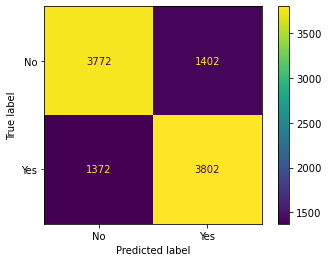

In [27]:
plot_confusion_matrix(classification4, X_sm, y_sm)

## TomekLinks

In [28]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')

transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)

X_tl, y_tl = tl.fit_sample(X_scaled, Y)
pd.DataFrame(y_tl).value_counts()

/usr/local/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


Churn
No       4694
Yes      1869
dtype: int64

In [29]:
classification5 = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)

print("The accuracy of the model is: ",round(classification5.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification5.predict(X_tl)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.45


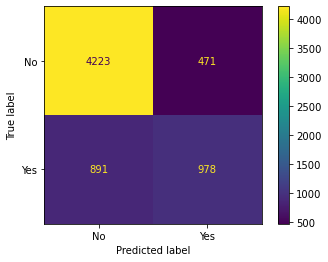

In [30]:
plot_confusion_matrix(classification5, X_tl, y_tl)